# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex medium (512), strong scaling benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [28]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [29]:
import sys
sys.path.append('../../../python-modules')

In [30]:
from appanalysis import osbli

## Read data files

### ARCHER

In [31]:
archerfiles = {1:'../TGV512ss/results/ARCHER/output_1nodes_201808020923.txt'
               }

In [32]:
archercpn = 24
archernodes, archertime, archerperf = osbli.calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              24            10.0                0.100


### Cirrus

In [33]:
cirrusfiles = {1:'../TGV512ss/results/Cirrus/output_1nodes_201808020826.txt',
               2:'../TGV512ss/results/Cirrus/output_2nodes_201808020850.txt',
               4:'../TGV512ss/results/Cirrus/output_4nodes_201808020916.txt',
               8:'../TGV512ss/results/Cirrus/output_8nodes_201808020924.txt'
               }

In [34]:
cirruscpn = 36
cirrusnodes, cirrustime, cirrusperf = osbli.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              36            10.3                0.097
              2              72             5.4                0.186
              4             144             3.0                0.331
              8             288             1.4                0.713


### Peta4 Skylake

In [35]:
peta4files = {1:'../TGV512ss/results/CSD3-Skylake/output_1nodes_201808021001.txt'
               }

In [36]:
peta4cpn = 32
peta4nodes, peta4time, peta4perf = osbli.calcperf(peta4files, peta4cpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              32             8.2                0.122


### Isambard

In [37]:
gw4files = {1:'../TGV512ss/results/Isambard/output_1nodes_201808020732.txt'
               }

In [38]:
gw4cpn = 64
gw4nodes, gw4time, gw4perf = osbli.calcperf(gw4files, gw4cpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              64             5.6                0.178


## Plot performance

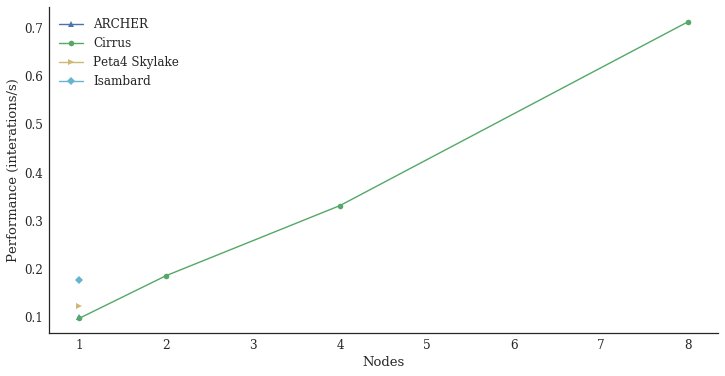

In [40]:
plt.plot(archernodes, archerperf, '^-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(peta4nodes, peta4perf, '>-', color=cols[4], label='Peta4 Skylake')
plt.plot(gw4nodes, gw4perf, 'D-', color=cols[5], label='Isambard')
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()

## Compare performance

In [43]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archertime[0]
cperf['ARCHER'] = archertime[0]*archercpn
nperf['Cirrus'] = cirrustime[0]
cperf['Cirrus'] = cirrustime[0]*cirruscpn
nperf['Peta4 Skylake'] = peta4time[0]
cperf['Peta4 Skylake'] = peta4time[0]*peta4cpn
nperf['Isambard'] = gw4time[0]
cperf['Isambard'] = gw4time[0]*gw4cpn

print("Performance improvement relative to ARCHER:\n")
print("{:>15s} {:>15s} {:>15s}".format('System', 'Iter. Time (s)', 'Improvement'))
print("{:>15s} {:>15s} {:>15s}".format('======', '==============', '==========='))
print("per-node")
for system in sorted(nperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system]))

print("per-core")
for system in sorted(cperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system]))

Performance improvement relative to ARCHER:

         System  Iter. Time (s)     Improvement
         ======  ==============     ===========
per-node
         ARCHER           9.999           1.000
         Cirrus          10.313           0.970
       Isambard           5.628           1.777
  Peta4 Skylake           8.191           1.221
per-core
         ARCHER         239.979           1.000
         Cirrus         371.268           0.646
       Isambard         360.220           0.666
  Peta4 Skylake         262.108           0.916


The per-core comparisons are extrapolated from the single node performance numbers assuming perfect scaling within a node.